<a href="https://www.kaggle.com/code/ksetdekov/coffee-machine-optimizer?scriptVersionId=222485986" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install glis~=2.0.2

  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for pydoe: filename=pyDOE-0.3.8-py3-none-any.whl size=18168 sha256=e44307a85fda69365606bf67d07ca55c36513e030dc133db0fa55e2a685bf6c0
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=c35787a2dc2ff498624aa7148edba6c8781deb8df101df470aa0302c100a72a4
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pydoe pyswarm


In [2]:
from glis.solvers import GLISp
import numpy as np
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

key = 3
np.random.seed(key)  # rng default for reproducibility
print("Solve the problem incrementally (i.e., provide the preference at each iteration)")
n_initial_random = 10
lb = np.array([
    0, # coffee
    0, # size
    1, # ground
    1  # кнопка размера
    ])
ub = np.array([
    2, # coffee
    2, # size
    7, # ground
    2  # кнопка размера
    ])
     
prob = GLISp(bounds=(lb, ub), n_initial_random=n_initial_random, RBFcalibrate=True, acquisition_method="prob_improvement")
xbest, x = prob.initialize()  # get first two random samples

Solve the problem incrementally (i.e., provide the preference at each iteration)


In [3]:
def param_des(arr, pos=0, name='coffee'):
    if arr[pos] < 1:
        return f'{name} min + {str(round(arr[pos], 1))}'
    elif arr[pos] <1.5:
        return f'{name} middle + {str(round(arr[pos]-1, 1))}'
    else:
        return f'{name} max - {str(round(2-arr[pos], 1))}'


def ground(arr):
    return(f'ground {str(round(arr[2], 1))}')


def cups_count(arr):
    return(f'кнопка стаканов {str(round(arr[3], 0))}')

def cup_asker(arr1, arr2):
    print('первый стакан')
    print(param_des(arr1, pos=0, name='coffee'))
    print(param_des(arr1, pos=1, name='size'))
    print(ground(arr1))
    print(cups_count(arr1))
    print('\n')

    print('второй стакан')
    print(param_des(arr2, pos=0, name='coffee'))
    print(param_des(arr2, pos=1, name='size'))
    print(ground(arr2))
    print(cups_count(arr2))

    print('1, если первый стакан вкуснее, -1 если второй и 0, если не отличить')


cup_asker(xbest, x)

equal_to_best = {}

первый стакан
coffee min + 0.5
size min + 0.4
ground 2.9
кнопка стаканов 1.0


второй стакан
coffee min + 0.7
size middle + 0.0
ground 2.5
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [4]:
pref = 0
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[0] = pref

Query #  1 (no improvement): testing x = [ 0.7011,  1.0232,  2.4895,  1.0826]
первый стакан
coffee min + 0.5
size min + 0.4
ground 2.9
кнопка стаканов 1.0


второй стакан
coffee max - 0.1
size min + 0.8
ground 6.3
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [5]:
pref = -1 # слишком мало первого
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[1] = pref     

Query #  2 (***improved x!): testing x = [ 1.8567,  0.7836,  6.3379,  1.7801]
первый стакан
coffee max - 0.1
size min + 0.8
ground 6.3
кнопка стаканов 2.0


второй стакан
coffee max - 0.3
size min + 0.1
ground 4.1
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [6]:
pref = 1 # очень маленький второй
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[2] = pref          

Query #  3 (no improvement): testing x = [ 1.6700,  0.0979,  4.0516,  1.9828]
первый стакан
coffee max - 0.1
size min + 0.8
ground 6.3
кнопка стаканов 2.0


второй стакан
coffee max - 0.4
size min + 0.2
ground 1.8
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [7]:
pref = 1 # очень маленький второй
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[3] = pref              

Query #  4 (no improvement): testing x = [ 1.5640,  0.2285,  1.7814,  1.8786]
первый стакан
coffee max - 0.1
size min + 0.8
ground 6.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.9
size max - 0.5
ground 6.7
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [8]:
pref = 0 # оба норм
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[4] = pref                   

Query #  5 (no improvement): testing x = [ 0.8555,  1.5143,  6.7272,  1.4693]
первый стакан
coffee max - 0.1
size min + 0.8
ground 6.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [9]:
pref = -1 # чуть вкуснее
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[5] = pref                        

Query #  6 (***improved x!): testing x = [ 1.2659,  1.2723,  1.3241,  1.5666]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size min + 0.8
ground 4.0
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [10]:
pref = 1 # слишком маленький второй
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[6] = pref                             

Query #  7 (no improvement): testing x = [ 1.1504,  0.8352,  3.9942,  1.3926]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.2
size max - 0.0
ground 5.7
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [11]:
pref = 0 # вроде норм
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[7] = pref                             

Query #  8 (no improvement): testing x = [ 0.1688,  1.9764,  5.7287,  1.1807]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.3
size max - 0.2
ground 4.9
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [12]:
pref = 1 # не вкусно
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[8] = pref        

Query #  9 (no improvement): testing x = [ 0.3043,  1.7545,  4.9157,  1.6425]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [13]:
pref = 0 # одинаковые
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[9] = pref            

Query # 10 (no improvement): testing x = [ 1.2644,  1.3332,  1.2610,  1.5571]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.3
size middle + 0.4
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [14]:
pref = 1 # вкуснее первый
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[10] = pref                 

Query # 11 (no improvement): testing x = [ 1.2582,  1.3876,  1.0038,  1.5496]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size middle + 0.0
ground 2.2
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [15]:
pref = 1 # первый хороший, а второй очень ядреный
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[11] = pref                      

Query # 12 (no improvement): testing x = [ 1.1998,  1.0441,  2.2014,  1.4991]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size middle + 0.2
ground 1.6
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [16]:
pref = 0 # почти одинаковые
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 13 (no improvement): testing x = [ 1.2249,  1.2100,  1.5535,  1.5447]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size middle + 0.2
ground 1.6
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [17]:
pref = 0 # почти одинаковые
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 14 (no improvement): testing x = [ 1.2144,  1.2271,  1.6125,  1.5410]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size middle + 0.2
ground 1.7
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [18]:
pref = 0 # почти одинаковые
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 15 (no improvement): testing x = [ 1.1648,  1.2446,  1.6648,  1.5233]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size middle + 0.2
ground 1.6
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [19]:
pref = 0 # почти одинаковые
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 16 (no improvement): testing x = [ 1.2111,  1.2113,  1.6123,  1.5349]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size middle + 0.2
ground 1.3
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [20]:
pref = 0 # почти одинаковые
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 17 (no improvement): testing x = [ 1.1753,  1.2043,  1.2827,  1.5516]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.2
size max - 0.0
ground 5.5
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [21]:
pref = 0 # не вижу разницы
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 18 (no improvement): testing x = [ 0.1845,  2.0000,  5.4788,  1.1847]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size middle + 0.2
ground 1.6
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [22]:
pref = 0 # не вижу разницы
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 19 (no improvement): testing x = [ 1.1864,  1.2101,  1.6195,  1.5468]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.1
size max - 0.0
ground 5.7
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [23]:
pref = 1 # второй не вкусный
x = prob.update(pref)
prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 20 (no improvement): testing x = [ 0.1234,  1.9550,  5.6710,  1.1996]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size middle + 0.2
ground 1.4
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [24]:
pref = 0 # одинаково
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 21 (no improvement): testing x = [ 1.1638,  1.1654,  1.4396,  1.5535]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size middle + 0.2
ground 1.6
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [25]:
pref = 1 # мелкий помол вкуснее
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref       

Query # 22 (no improvement): testing x = [ 1.2127,  1.2135,  1.5919,  1.5403]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.7
size middle + 0.0
ground 2.5
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [26]:
pref = 1 # слабый и мало
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 23 (no improvement): testing x = [ 0.7197,  1.0378,  2.5271,  1.0825]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee max - 0.0
size max - 0.0
ground 7.0
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [27]:
pref = 1 # мне больше нравится большего размера
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 24 (no improvement): testing x = [ 2.0000,  2.0000,  7.0000,  1.0000]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.0
size min + 0.0
ground 6.8
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [28]:
pref = 1 # второй супер маленький
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 25 (no improvement): testing x = [ 0.0000,  0.0000,  6.8232,  2.0000]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee max - 0.0
size max - 0.0
ground 3.3
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [29]:
pref = 1 # второй переливает стакан, нельзя изготовить
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 26 (no improvement): testing x = [ 2.0000,  2.0000,  3.2726,  2.0000]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.0
size min + 0.0
ground 1.0
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [30]:
pref = 1 # второй стакан супер маленький
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 27 (no improvement): testing x = [ 0.0000,  0.0000,  1.0000,  1.0000]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.0
size max - 0.0
ground 7.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [31]:
pref = 1 # второй стакан переливается
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 28 (no improvement): testing x = [ 0.0000,  2.0000,  7.0000,  2.0000]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.2
size max - 0.0
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [32]:
pref = 1 # второй стакан переливается
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 29 (no improvement): testing x = [ 0.1720,  2.0000,  1.0000,  2.0000]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.0
size min + 0.8
ground 1.2
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [33]:
pref = 1 # второй стакан невкусный
x = prob.update(pref)
prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 30 (no improvement): testing x = [ 0.0299,  0.7843,  1.1821,  2.0000]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.0
size max - 0.0
ground 2.8
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [34]:
pref = 1 # второй стакан нельзя сделать
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 31 (no improvement): testing x = [ 0.0000,  2.0000,  2.7562,  1.5231]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.8
size max - 0.4
ground 4.2
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [35]:
pref = 1 # меньше нравится
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 32 (no improvement): testing x = [ 0.7562,  1.5817,  4.1534,  1.3406]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.1
size max - 0.0
ground 6.7
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [36]:
pref = 1 # меньше нравится и 1 стакан
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 33 (no improvement): testing x = [ 0.1123,  2.0000,  6.7218,  1.0198]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.0
size max - 0.0
ground 1.0
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [37]:
pref = 1 # меньше нравится и 1 стакан
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 34 (no improvement): testing x = [ 0.0000,  2.0000,  1.0000,  1.3191]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee max - 0.0
size min + 0.0
ground 1.0
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [38]:
pref = 1 # супер мало
x = prob.update(pref)
prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 35 (no improvement): testing x = [ 2.0000,  0.0000,  1.0000,  1.0000]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee min + 0.0
size min + 0.0
ground 7.0
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [39]:
pref = 1 # супер мало
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 36 (no improvement): testing x = [ 0.0318,  0.0000,  7.0000,  1.0000]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size max - 0.4
ground 2.7
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [40]:
pref = 0 # оба вкусные
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 37 (no improvement): testing x = [ 1.2444,  1.5707,  2.7199,  1.8903]
первый стакан
coffee middle + 0.3
size middle + 0.3
ground 1.3
кнопка стаканов 2.0


второй стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [41]:
pref = -1 # чуть больше нравится
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 38 (***improved x!): testing x = [ 1.3048,  1.5753,  1.0000,  1.9952]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.3
size middle + 0.2
ground 1.7
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [42]:
pref = 0 # оба хорошие
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 39 (no improvement): testing x = [ 1.6749,  1.2486,  1.7347,  2.0000]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.2
size min + 0.9
ground 2.6
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [43]:
pref = 1 # слишком мало второй
x = prob.update(pref)
prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 40 (no improvement): testing x = [ 1.7606,  0.8808,  2.5737,  2.0000]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.4
size middle + 0.3
ground 1.6
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [44]:
pref = 1 # второй горковат
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 41 (no improvement): testing x = [ 1.5623,  1.2603,  1.5823,  2.0000]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.4
size max - 0.2
ground 3.1
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [45]:
pref = 1 # второй горковат
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 42 (no improvement): testing x = [ 1.6019,  1.8148,  3.1354,  1.8624]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee min + 0.1
size middle + 0.4
ground 1.1
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [46]:
pref = 0 # я не могу различить
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 43 (no improvement): testing x = [ 0.0733,  1.3630,  1.1008,  1.0000]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee middle + 0.4
size max - 0.0
ground 7.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [47]:
pref = 1 #это нельзя заварить
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 44 (no improvement): testing x = [ 1.3913,  2.0000,  7.0000,  1.8418]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee min + 0.6
size middle + 0.3
ground 1.9
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [48]:
pref = 1 #я люблю больше объем
x = prob.update(pref)
prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 45 (no improvement): testing x = [ 0.6455,  1.2950,  1.8518,  1.0000]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.4
size max - 0.3
ground 2.9
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [49]:
pref = 0 # примерно одинаково
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref        

Query # 46 (no improvement): testing x = [ 1.5924,  1.7167,  2.8703,  2.0000]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.4
size max - 0.4
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [50]:
pref = 0 # no change
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 47 (no improvement): testing x = [ 1.5865,  1.5554,  1.0000,  2.0000]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.3
size max - 0.0
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [51]:
pref = 1 # нельзя заварить
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 48 (no improvement): testing x = [ 1.6501,  2.0000,  1.0000,  1.6685]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee middle + 0.0
size max - 0.2
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [52]:
pref = 1 # больше нравится крепче
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 49 (no improvement): testing x = [ 1.0207,  1.7962,  1.0000,  1.8939]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee middle + 0.4
size max - 0.4
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [53]:
pref = 0 # нет разницы
x = prob.update(pref)
prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 50 (no improvement): testing x = [ 1.4080,  1.6416,  1.0000,  2.0000]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee min + 1.0
size middle + 0.5
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [54]:
pref = 1 # мне больше нравится крепость
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 51 (no improvement): testing x = [ 0.9858,  1.4908,  1.0000,  1.8946]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee min + 0.5
size min + 0.7
ground 1.0
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [55]:
pref = 1 # мне больше нравится крепость
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 52 (no improvement): testing x = [ 0.5369,  0.7016,  1.0000,  1.2567]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee min + 0.1
size min + 0.0
ground 1.2
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [56]:
pref = 1 # слишком маленькая
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 53 (no improvement): testing x = [ 0.1149,  0.0498,  1.1910,  1.0000]
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [57]:
pref = 0 # похожу
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 54 (no improvement): testing x = [ 1.6677,  1.5933,  1.0000,  1.8740]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.4
size max - 0.3
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [58]:
pref = 0 # похоже
x = prob.update(pref)
prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 55 (no improvement): testing x = [ 1.6480,  1.6850,  1.0000,  2.0000]
Recalibrating RBF: .......... done.
первый стакан
coffee middle + 0.3
size max - 0.4
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.4
size max - 0.3
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [59]:
pref = -1 # чуть вкуснее
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 56 (***improved x!): testing x = [ 1.6075,  1.7414,  1.0000,  1.9933]
первый стакан
coffee max - 0.4
size max - 0.3
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee min + 0.0
size max - 0.2
ground 1.8
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [60]:
pref = 1 # мне не нравится
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 57 (no improvement): testing x = [ 0.0000,  1.8014,  1.8142,  1.0000]
первый стакан
coffee max - 0.4
size max - 0.3
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.2
size max - 0.2
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [61]:
pref = 1 # слишком много
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 58 (no improvement): testing x = [ 1.7849,  1.7906,  1.0000,  1.9720]
первый стакан
coffee max - 0.4
size max - 0.3
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee max - 0.5
size max - 0.4
ground 1.8
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [62]:
pref = 1 # мне не нравится
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 59 (no improvement): testing x = [ 1.5191,  1.5956,  1.8321,  1.9683]
первый стакан
coffee max - 0.4
size max - 0.3
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee middle + 0.5
size max - 0.3
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [63]:
pref = 0 # одинаково
x = prob.update(pref)
prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 60 (no improvement): testing x = [ 1.4991,  1.7294,  1.0000,  2.0000]
Recalibrating RBF: .......... done.
первый стакан
coffee max - 0.4
size max - 0.3
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee min + 0.0
size max - 0.4
ground 1.7
кнопка стаканов 1.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [64]:
pref = 1 # больше нравится старая
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 61 (no improvement): testing x = [ 0.0000,  1.5740,  1.7439,  1.0000]
первый стакан
coffee max - 0.4
size max - 0.3
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee middle + 0.2
size max - 0.3
ground 5.6
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [65]:
pref = 1 # больше нравится прошлая
x = prob.update(pref)
# prob.rbf_recalibrate()
xbest = prob.xbest
cup_asker(xbest, x)
equal_to_best[len(prob.X)-3] = pref   

Query # 62 (no improvement): testing x = [ 1.1975,  1.6682,  5.5704,  2.0000]
первый стакан
coffee max - 0.4
size max - 0.3
ground 1.0
кнопка стаканов 2.0


второй стакан
coffee middle + 0.4
size max - 0.1
ground 1.0
кнопка стаканов 2.0
1, если первый стакан вкуснее, -1 если второй и 0, если не отличить


In [66]:
pd.DataFrame(equal_to_best.items(), columns = ['step', 'comparison'])

,step,comparison
0,0,0
1,1,-1
2,2,1
3,3,1
4,4,0
...,...,...
57,57,1
58,58,1
59,59,0
60,60,1


In [67]:
X = np.array(prob.X)
steps_df = pd.DataFrame(X)
steps_df.columns = ['coffee', 'size', 'ground','кнопка размера']
steps_df['кнопка размера'] = np.where((steps_df['кнопка размера'])>1.5, 2, 1)
best_option = steps_df.iloc[prob.ibest_seq].drop_duplicates()
best_option['improved_iteration'] = list(range(1,len(best_option)+1))
best_option

,coffee,size,ground,кнопка размера,improved_iteration
0,0.463899,0.404245,2.924180,1,1
2,1.856681,0.783606,6.337898,2,2
6,1.265914,1.272330,1.324072,2,3
38,1.304802,1.575325,1.000000,2,4
56,1.607544,1.741385,1.000000,2,5


In [68]:
steps_df = steps_df.join(best_option[['improved_iteration']])
steps_df['improved_iteration'] = (
    pd.to_numeric(steps_df['improved_iteration'],
                  errors='coerce')
      .fillna(0)
    ).astype(int)
steps_df.tail()

,coffee,size,ground,кнопка размера,improved_iteration
59,1.519127,1.595582,1.832062,2,0
60,1.499073,1.729362,1.000000,2,0
61,0.000000,1.573975,1.743894,1,0
62,1.197497,1.668230,5.570412,2,0
63,1.441972,1.927682,1.000000,2,0


In [69]:
print(f'шагов без улучшений - {steps_df.iloc[best_option.iloc[-1].name:].shape[0]}')

шагов без улучшений - 8


In [70]:
import plotly.express as px

fig = px.scatter_matrix(
    steps_df,
    dimensions=steps_df.columns[:-1],
    color="improved_iteration"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [71]:
from sklearn.manifold import TSNE

features = steps_df.loc[:, :'кнопка размера']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=steps_df.improved_iteration, labels={'color': 'improved_iteration'}
)
fig.show()

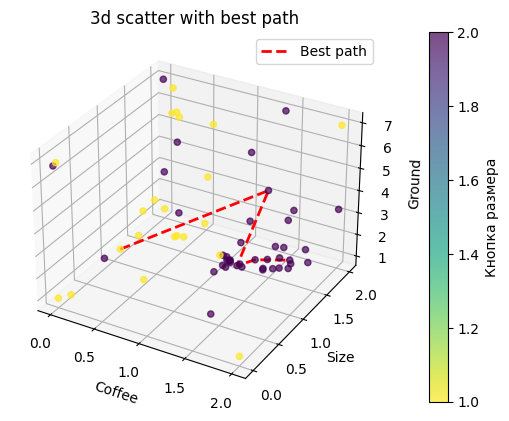

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(steps_df['coffee'],
               steps_df['size'],
               steps_df['ground'],
               c = steps_df['кнопка размера'],
               cmap='viridis_r',
                alpha=0.7
               )
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Кнопка размера')

best_option = steps_df.iloc[prob.ibest_seq].drop_duplicates()
ax.plot(best_option['coffee'],
               best_option['size'],
               best_option['ground'],
               color = 'red',
               linestyle='--',
               linewidth=2,
                label='Best path'
               )
ax.set_xlabel('Coffee')
ax.set_ylabel('Size')
ax.set_zlabel('Ground')

ax.set_title('3d scatter with best path')
ax.legend()
plt.show()

In [73]:
fig = px.scatter_3d(steps_df, x='coffee', y='size', z='ground', 
                    color='кнопка размера', 
                    opacity=0.7, 
                    color_discrete_sequence=px.colors.qualitative.Alphabet)
# this is best path, plot it as a  directional line in 3d
best_option = steps_df.iloc[prob.ibest_seq].drop_duplicates()
# Create the line plot
gradient = best_option.index

line_plot = px.line_3d(best_option, x='coffee', y='size', z='ground')
line_plot['data'][0]['line']['color'] = '#FF0000'
line_plot['data'][0]['line']['dash'] = 'dash'
fig.add_trace(line_plot.data[0])
fig.update_layout(title='')

fig.update_layout(template='plotly_white')

go.Figure(fig).show()
